In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('train.csv', usecols=['Age', "Fare", "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.dropna(inplace=True)
df.shape

(714, 3)

In [7]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [9]:
X_train.head(1)

,Age,Fare
328,31.0,20.525


In [10]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_pred, y_test)

0.6223776223776224

In [20]:
np.mean(cross_val_score(clf, X, y, scoring='accuracy', cv=10))

0.6331181533646322

In [21]:
kbin_age_fare = ColumnTransformer(transformers=[
    ('age', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans'), [0]),
    ('fare', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans'), [1])
])

In [22]:
X_train_transformed = kbin_age_fare.fit_transform(X_train)
X_test_transformed = kbin_age_fare.transform(X_test)

In [23]:
X_train_transformed

array([[2., 0.],
       [1., 0.],
       [2., 0.],
       ...,
       [3., 2.],
       [2., 0.],
       [2., 0.]])

In [24]:
clf_trnf = DecisionTreeClassifier()
clf_trnf.fit(X_train_transformed, y_train)


DecisionTreeClassifier()

In [25]:
y_pred_trf = clf_trnf.predict(X_test_transformed)

In [26]:
accuracy_score(y_pred_trf, y_test)

0.6223776223776224

In [27]:
kbin_age_fare.named_transformers_['age'].n_bins_

array([5])

In [28]:
kbin_age_fare.named_transformers_['fare'].n_bins_

array([5])

In [29]:
X_transformed = kbin_age_fare.fit_transform(X)

In [30]:
np.mean(cross_val_score(clf_trnf, X, y, scoring='accuracy', cv=10))

0.6275234741784038

In [31]:
kbin_age_fare.named_transformers_['fare'].bin_edges_

array([array([  0.        ,  41.75926352,  99.46746367, 185.58791167,
              376.16057   , 512.3292    ])                           ],
      dtype=object)

In [32]:
kbin_age_fare.named_transformers_['age'].bin_edges_

array([array([ 0.42      , 13.15909192, 27.01303492, 39.3964625 , 54.04132231,
              80.        ])                                                   ],
      dtype=object)

In [33]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_transformed[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_transformed[:,1]
})

In [36]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=kbin_age_fare.named_transformers_['age'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=kbin_age_fare.named_transformers_['fare'].bin_edges_[0].tolist())

In [37]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
38,18.0,1.0,18.000,0.0,"(13.159, 27.013]","(0.0, 41.759]"
423,28.0,2.0,14.400,0.0,"(27.013, 39.396]","(0.0, 41.759]"
586,47.0,3.0,15.000,0.0,"(39.396, 54.041]","(0.0, 41.759]"
393,23.0,1.0,113.275,2.0,"(13.159, 27.013]","(99.467, 185.588]"
450,36.0,2.0,27.750,0.0,"(27.013, 39.396]","(0.0, 41.759]"


In [38]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6344874804381846


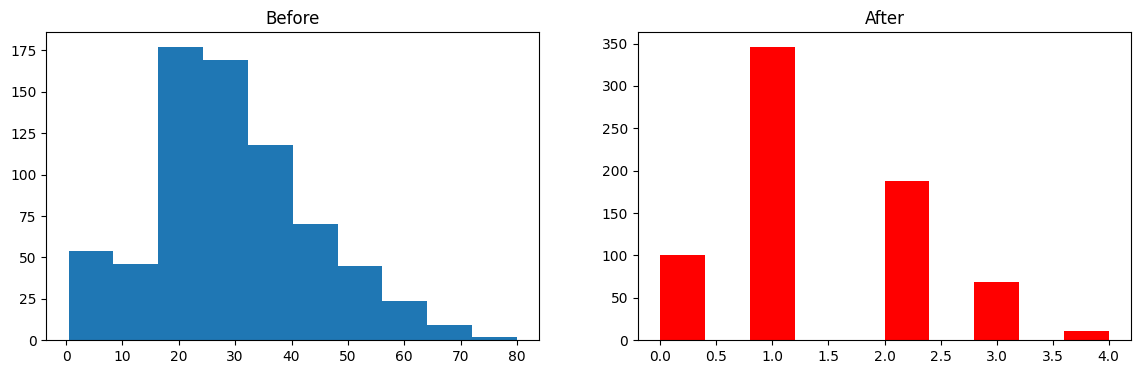

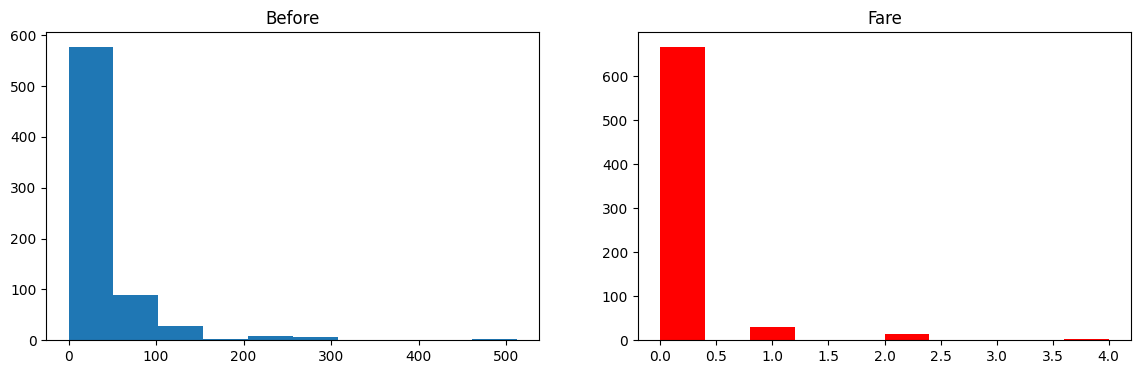

In [40]:
discretize(5,'uniform')


0.6372848200312988


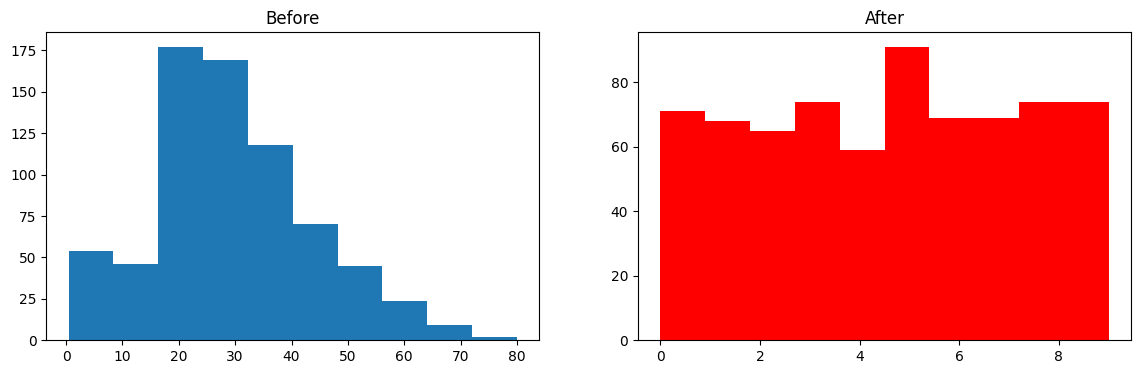

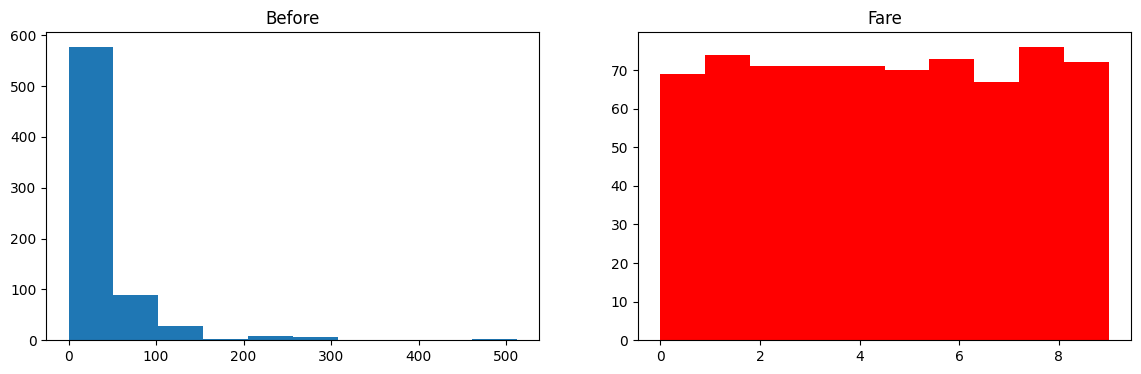

In [44]:
discretize(10,'quantile')